In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from seaborn import lmplot

In [28]:
% matplotlib inline

In [2]:
df = pd.read_pickle('./pickleJar/d_nomad_aop_with_longhurst.pkl')

In [3]:
df.head().T

,0,1,2,3,4
id,4045,4056,4057,5949,5950
datetime,1998-08-29 17:55:00,1998-09-02 15:52:00,1998-09-02 18:10:00,1997-10-12 23:38:00,1997-10-13 18:33:00
doy,242.625,246.492,245.917,286.592,287.3
lat,60.587,60.674,60.604,59.118,58.792
lon,-146.409,-147.682,-147.205,-148.677,-148.493
Province,Alaska Downwelling Coastal Province,Alaska Downwelling Coastal Province,Alaska Downwelling Coastal Province,Alaska Downwelling Coastal Province,Alaska Downwelling Coastal Province
ProvCode,ALSK,ALSK,ALSK,ALSK,ALSK
ProvCat,0,0,0,0,0
Biome,Coastal,Coastal,Coastal,Coastal,Coastal
BiomCat,0,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4459 entries, 0 to 4458
Data columns (total 30 columns):
id              4459 non-null object
datetime        4459 non-null datetime64[ns]
doy             4459 non-null float64
lat             4459 non-null float64
lon             4459 non-null float64
Province        4459 non-null object
ProvCode        4459 non-null object
ProvCat         4459 non-null int64
Biome           4459 non-null object
BiomCat         4459 non-null int8
etopo2          4459 non-null float64
oisst           4459 non-null float64
woa_sst_mean    2516 non-null float64
woa_sst_se      2516 non-null float64
woa_sal_mean    2511 non-null float64
woa_sal_se      2511 non-null float64
rrs411          4293 non-null float64
rrs443          4456 non-null float64
rrs489          4422 non-null float64
rrs510          4207 non-null float64
rrs555          4453 non-null float64
rrs670          3905 non-null float64
mxBl            4459 non-null float64
mxBlId          4459 

In [12]:
bands = np.array([411, 443, 489, 510, 555, 670]).reshape(-1, 1)
rrs_matrix = df.filter(regex='rrs').values

In [25]:
df.insert(df.columns.get_loc('is_hplc'), 'avw',
          (rrs_matrix.dot(bands)) / rrs_matrix.sum(axis=1).reshape(-1, 1))

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4459 entries, 0 to 4458
Data columns (total 31 columns):
id              4459 non-null object
datetime        4459 non-null datetime64[ns]
doy             4459 non-null float64
lat             4459 non-null float64
lon             4459 non-null float64
Province        4459 non-null object
ProvCode        4459 non-null object
ProvCat         4459 non-null int64
Biome           4459 non-null object
BiomCat         4459 non-null int8
etopo2          4459 non-null float64
oisst           4459 non-null float64
woa_sst_mean    2516 non-null float64
woa_sst_se      2516 non-null float64
woa_sal_mean    2511 non-null float64
woa_sal_se      2511 non-null float64
rrs411          4293 non-null float64
rrs443          4456 non-null float64
rrs489          4422 non-null float64
rrs510          4207 non-null float64
rrs555          4453 non-null float64
rrs670          3905 non-null float64
mxBl            4459 non-null float64
mxBlId          4459 

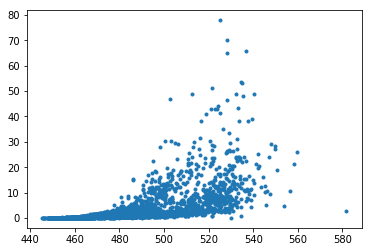

In [39]:
pl.plot(df.avw, df.chl, marker='.', ls='')